# Abstract 
Analyze yenta data made from tweets and my friends shared. This file mainly focused on using some statistical approarch. 

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('seaborn-darkgrid')

In [4]:
df = pd.read_csv('../yenta.csv')
df.gender = df.gender.replace('male', 0)
df.gender = df.gender.replace('female', 1)
df.head()

,gender,age,job,is_staff,cnt,male,female,under_21,22_25,26_30,...,top_2,top_3,top_4,top_5,top_1_cnt,top_2_cnt,top_3_cnt,top_4_cnt,top_5_cnt,length
0,0,22,designer,1,266,239,27,9,62,69,...,sales,marketing,pm,strategist,104,94,87,77,73,11
1,0,33,marketer,0,302,274,28,3,20,82,...,ceo,strategist,sales,pm,132,123,98,96,93,12
2,0,24,engineer marketer,0,1414,1304,110,19,199,337,...,sales,marketing,strategist,pm,498,471,467,430,335,12
3,0,34,cto,1,3030,2608,422,43,410,703,...,ceo,sales,strategist,pm,973,924,898,767,736,12
4,0,39,back-office,0,575,532,43,1,45,154,...,marketing,strategist,sales,pm,255,241,198,195,178,12


Previously, I found the relationship beween total count and components like genders and generations. Then, I use regression model to total count and gender factors to understand how much each genders effect to total count.

To comprehend below codes, we should learn the least square method. This is the most basic regression tool to numeric data. Main concept is to minimize error.
More precise explanation can accessible for you on [statsmodels official documentation](https://www.statsmodels.org/stable/regression.html).

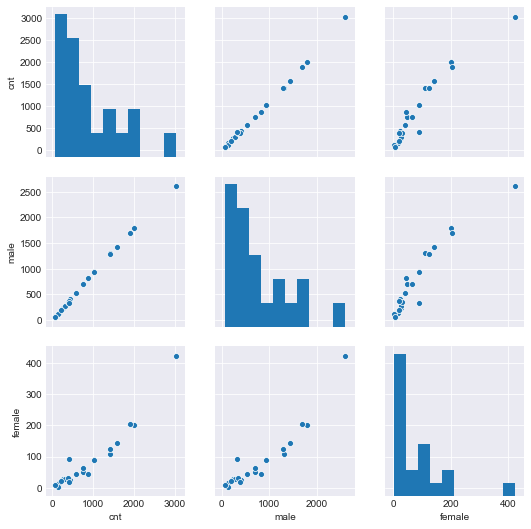

In [6]:
import statsmodels.api as sm

x = df[['male', 'female']]
y = df['cnt']

sns.pairplot(df[['cnt', 'male', 'female']])

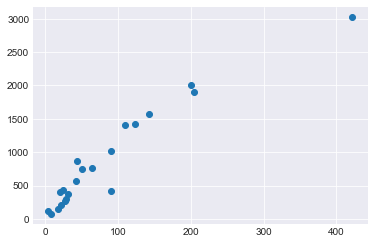

In [35]:
plt.scatter(x.female, y)
plt.show()

Fit OLS model to this data.

In [19]:
model = sm.OLS(y, x.male)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.146e+04
Date:                Sat, 19 Jan 2019   Prob (F-statistic):           8.64e-32
Time:                        17:03:29   Log-Likelihood:                -104.39
No. Observations:                  21   AIC:                             210.8
Df Residuals:                      20   BIC:                             211.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
male           1.1200      0.008    146.488      0.000       1.104       1.136
==============================================================================
Omnibus:                       23.539   Durbin-Watson:                   2.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.605
Skew:                           2.045   Prob(JB):                     3.06e-08
Kurtosis:                       7.777   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

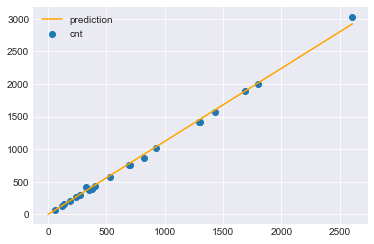

In [25]:
param = result.params['male']
x_plot = np.linspace(0, x.male.max(), 100)
plt.scatter(x.male, y)
plt.plot(x_plot, param * x_plot, c='orange', label='prediction')
plt.legend()
plt.show()

In [26]:
model = sm.OLS(y, x.female)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 19 Jan 2019   Prob (F-statistic):           1.14e-13
Time:                        17:10:10   Log-Likelihood:                -148.17
No. Observations:                  21   AIC:                             298.3
Df Residuals:                      20   BIC:                             299.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
female         8.7192      0.494     17.668      0.000       7.690       9.749
==============================================================================
Omnibus:                       13.950   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               12.871
Skew:                          -1.460   Prob(JB):                      0.00160
Kurtosis:                       5.488   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

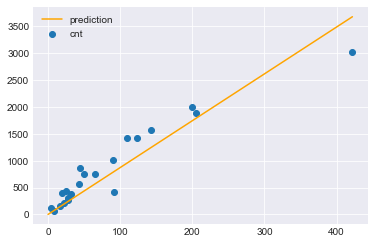

In [28]:
param = result.params['female']
x_plot = np.linspace(0, x.female.max(), 100)
plt.scatter(x.female, y)
plt.plot(x_plot, param * x_plot, c='orange', label='prediction')
plt.legend()
plt.show()

In [29]:
model = sm.OLS(x.female, x.male)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 female   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     244.7
Date:                Sat, 19 Jan 2019   Prob (F-statistic):           1.11e-12
Time:                        17:11:06   Log-Likelihood:                -104.42
No. Observations:                  21   AIC:                             210.8
Df Residuals:                      20   BIC:                             211.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
male           0.1198      0.008     15.644      0.000       0.104       0.136
==============================================================================
Omnibus:                       23.806   Durbin-Watson:                   2.263
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.390
Skew:                           2.063   Prob(JB):                     2.07e-08
Kurtosis:                       7.840   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

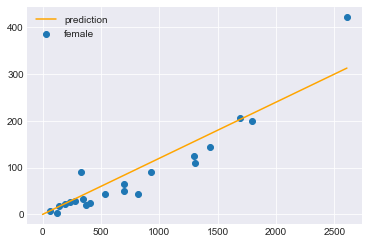

In [31]:
param = result.params['male']
x_plot = np.linspace(0, x.male.max(), 100)
plt.scatter(x.male, x.female)
plt.plot(x_plot, param * x_plot, c='orange', label='prediction')
plt.legend()
plt.show()